# Пример работы с прогнозным сервисом

Для примера возьмем данные "Индикатор бизнес-климата ЦБ (промышленность), пункты, Россия"

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import requests
import json

In [93]:
df = pd.read_csv(f'./raw_data/Новостной идекс ЦБ, Россия — Диаграмма.csv', sep=';')
df.columns = ['dataset', 'date', 'values']
df.head(3)

,dataset,date,values
0,62293,01.02.2004,1.283101
1,62293,01.03.2004,1.316614
2,62293,01.04.2004,1.544784


возьмем все значения кроме последних трех

In [94]:
horizon = 6

x = list(df['date'][:-horizon])
y = list(df['values'][:-horizon])

df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.date

построим график

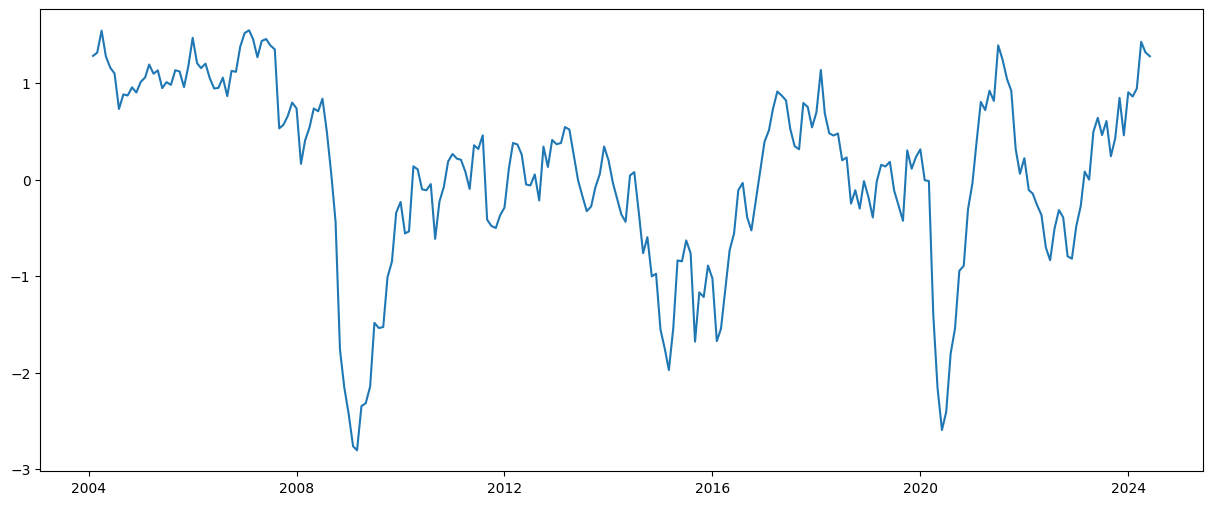

In [95]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df.date, df['values'])


# Формирование запроса

In [112]:
url = 'http://localhost:5051/forecast/api/v1/base'

data = {
    "hparams": {
        "lookback": 12,
        "horizon": 6,
        "epochs": 10,
        "learning_rate": 0.01
    },
    "target": {
        "values": y,
        "dates": x
    }
}

# Отправка запроса

In [113]:
response = requests.post(url, json=data)
response.status_code

200

Получаем список значений

In [114]:
forecast = response.json()

# прогноз модели на предыдущие значения
train_pred = forecast['previous']

# прогноз модели
pred_y = forecast['predict']

In [115]:
train_pred

[1.1010805368423462,
 0.7327805757522583,
 0.8840969204902649,
 0.8728043437004089,
 0.9570358991622925,
 0.9040769338607788,
 1.0141267776489258,
 1.0599262714385986,
 1.1939566135406494,
 1.0984236001968384,
 1.1331310272216797,
 0.9491828680038452,
 1.01083242893219,
 0.9828919172286987,
 1.1347429752349854,
 1.121468186378479,
 0.9598131775856018,
 1.1724439859390259,
 1.4699451923370361,
 1.207031011581421,
 1.156306505203247,
 1.203012228012085,
 1.052193522453308,
 0.944872260093689,
 0.9518474340438843,
 1.0578243732452393,
 0.8659986853599548,
 1.1280956268310547,
 1.1181154251098633,
 1.3777858018875122,
 1.519203543663025,
 1.5485299825668335,
 1.4586341381072998,
 1.269127368927002,
 1.4376730918884277,
 1.4577947854995728,
 1.3911492824554443,
 1.350832462310791,
 0.5322739481925964,
 0.5693504810333252,
 0.6638190150260925,
 0.7995994687080383,
 0.738568127155304,
 0.1640462726354599,
 0.40750810503959656,
 0.5421434640884399,
 0.7383549809455872,
 0.7094045877456665,
 0.

In [100]:
pred_y

[0.36233261227607727,
 0.30627888441085815,
 0.327762246131897,
 0.3699568212032318,
 0.48619896173477173,
 0.471301794052124]

Наносим на график

In [101]:
len(train_pred)

234

In [102]:
df.shape

(245, 3)

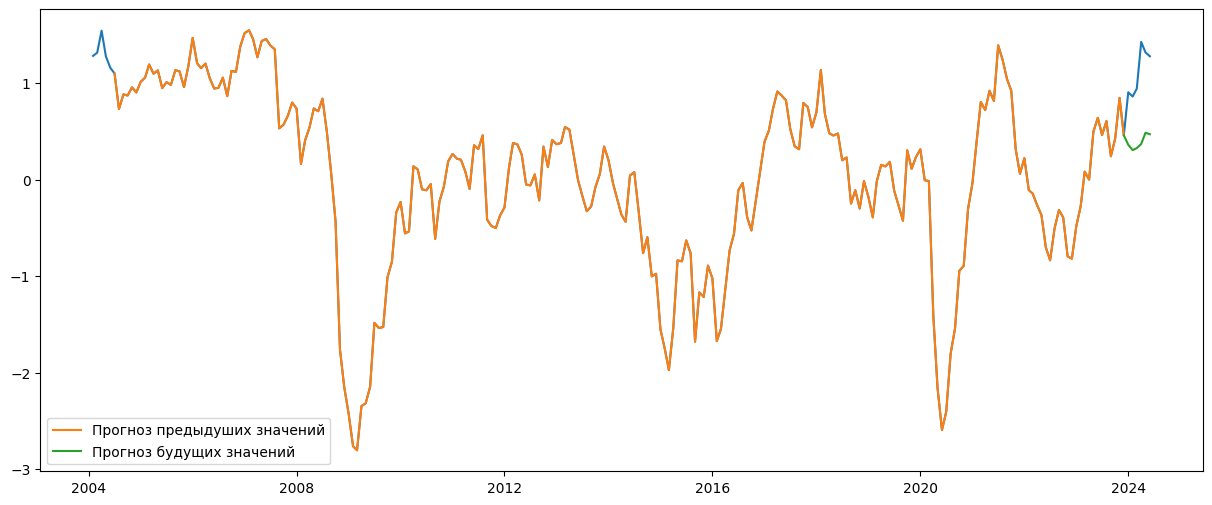

In [111]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df.date, df['values'])
ax.plot(df.date[5:-6], train_pred, label='Прогноз предыдуших значений')
ax.plot(df.date[-7:], [train_pred[-1]] + pred_y, label='Прогноз будущих значений')

ax.legend()